In [11]:
rounds = [0, 5, 10, 20, 30, 50, 70, 75, 80, 85, 95, 99]
num_workers = 30
FILE_PATH="../data_output/20201109_023124_mnist_no_attack_worker_update_batch20_opt"
   
          
import matplotlib.pyplot as plt
def plot_weights(x, y, title, threshold, color_map):
    figure = plt.figure(figsize=(18, 4))
    plt.scatter(x, y, c = color_map, cmap="brg")
    max_y = threshold if max(y) < threshold else max(y)
    plt.ylim([0, max_y])
    plt.title("Round {}".format(title))
    plt.colorbar(ticks=range(30))

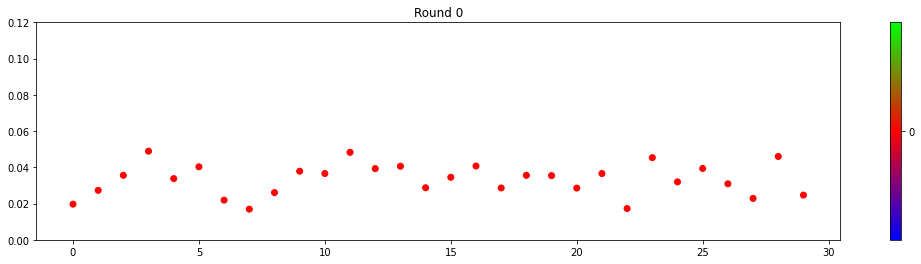

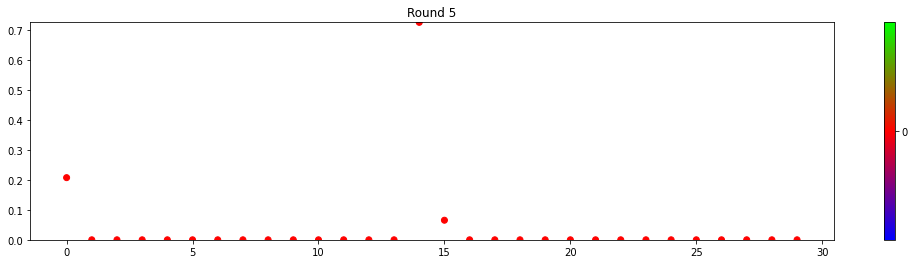

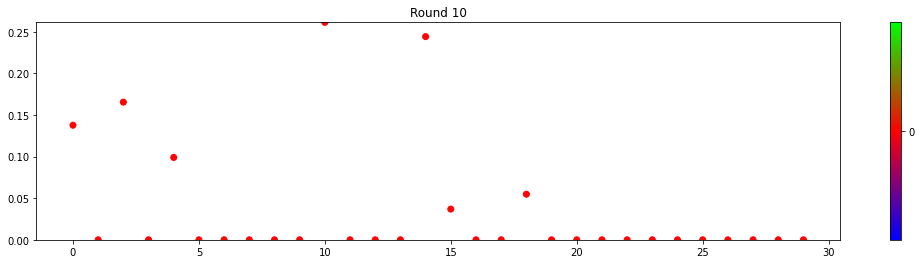

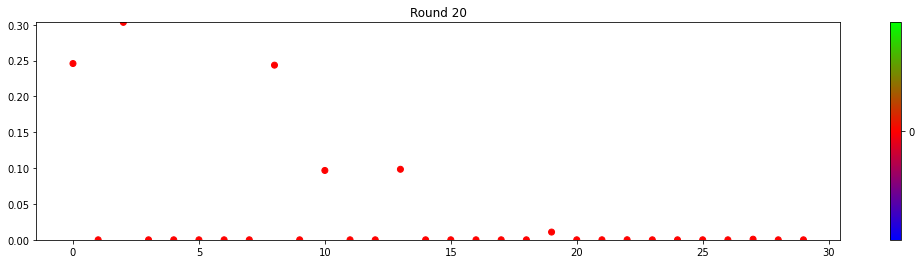

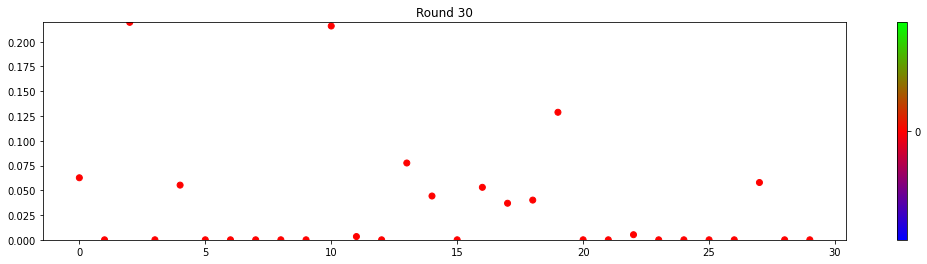

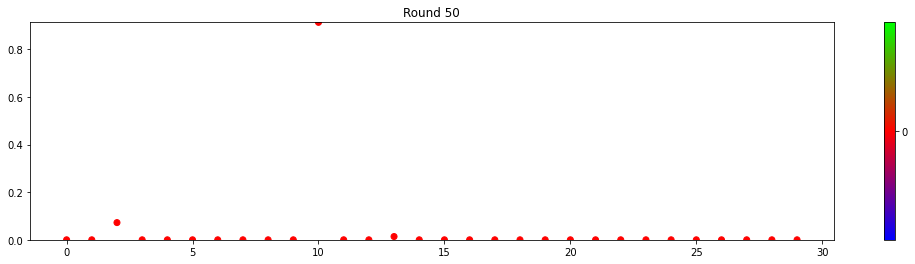

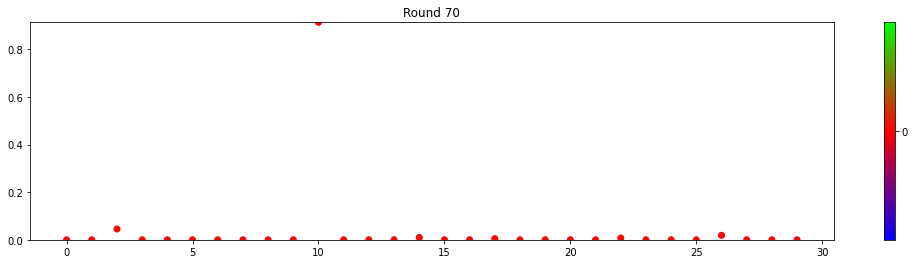

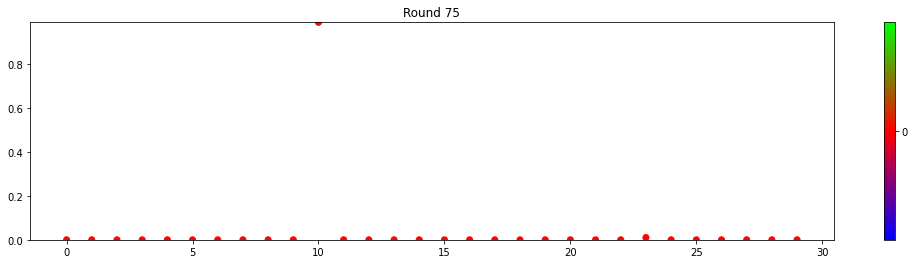

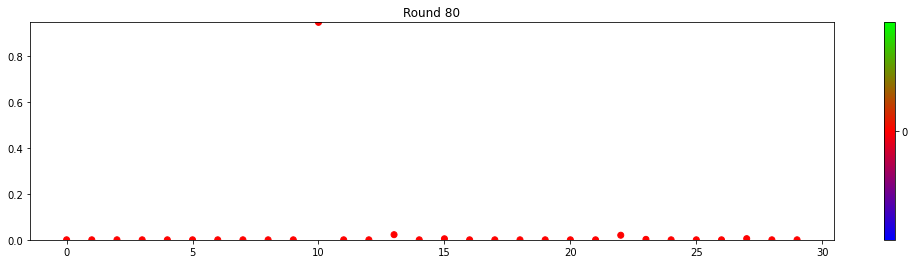

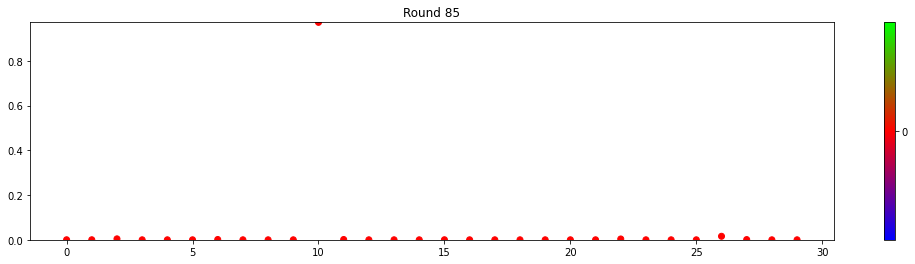

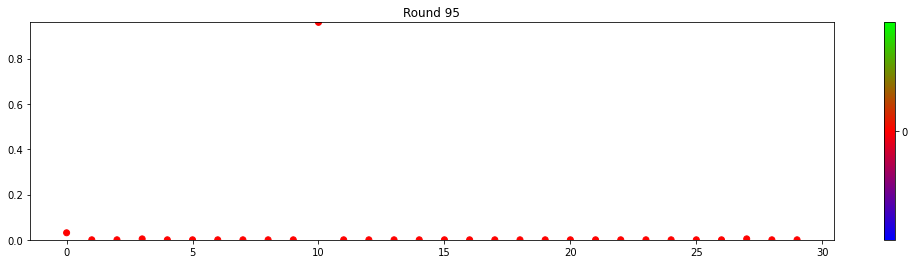

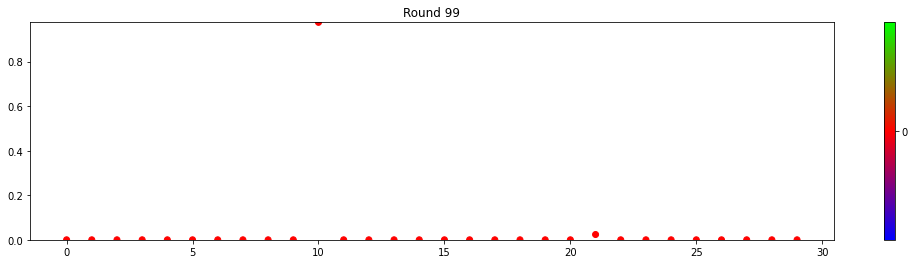

In [12]:
with open("{}/eavesdroppers".format(FILE_PATH)) as f:
    eavesdoppers = [int(i) for i in f.readlines()[0].replace('[','').replace(']','').split(', ')]
    
with open('{}/opt_weights'.format(FILE_PATH)) as f:
    lines = f.readlines()

color_map = [0 if ll not in eavesdoppers else 1 for ll in range(num_workers)]

for line_id, ll in enumerate(lines):
    if line_id in rounds:
        xx = ll.replace("[", "").replace("]\n", "").replace("   ", ' ').replace('  ', " ").split(" ")
        data = {i: float(xx[i]) for i in range(len(xx))}
        plot_weights(list(data.keys()), list(data.values()), line_id, 0.12, color_map)